# Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [1]:
import pandas as pd

"""
data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)

# Load the datasets
def get_dataset():
    merged_df1 = pd.read_csv('../databases/2018/student2018.csv')
    merged_df2 = pd.read_csv('../databases/2018/only_teacher2018.csv')
    merged_df1.merge(merged_df2, on=['CNT', 'CNTSCHID'], how='inner')
    return merged_df1

# Save the merged dataset to a CSV file
teacher_student = get_dataset()
teacher_student.to_csv('../databases/2018/teacher_student2018.csv', index=False)


"""

'\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n\n# Load the datasets\ndef get_dataset():\n    merged_df1 = pd.read_csv(\'../databases/2018/student2018.csv\')\n    merged_df2 = pd.read_csv(\'../databases/2018/only_teacher2018.csv\')\n    merged_df1.merge(merged_df2, on=[\'CNT\', \'CNTSCHID\'], how=\'inner\')\n    return merged_df1\n\n# Save the merged dataset to a CSV file\nteacher_student = get_dataset()\nteacher_student.to_csv(\'../databases/2018/teacher_student2018.csv\', index=False)\n\n\n'

In [2]:
"""
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/teacher_data_structure_2018.csv')

# List of columns to keep
columns_to_keep = list(data_map.map_enum.__members__.keys()) + [
'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',
'REPEAT', 'ST001D01T'
]

teacher_student = pd.read_csv('../../../databases/2018/teacher_student2018.csv')

filtered_teacher_student = teacher_student[columns_to_keep]
filtered_teacher_student.to_csv('../../../databases/2018/teacher2018.csv', index=False)

filtered_teacher_student.head(20)

"""

"\nimport sys\nimport os\n\n# Add the src directory to the Python path\nsys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path\n\nfrom pisadatamap.pisadatamap import PISADataMap\n\ndata_map = PISADataMap('../../../databases/2018/teacher_data_structure_2018.csv')\n\n# List of columns to keep\ncolumns_to_keep = list(data_map.map_enum.__members__.keys()) + [\n'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',\n'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE',\n'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',\n'REPEAT', 'ST001D01T'\n]\n\nteacher_student = pd.read_csv('../../../databases/2018/teacher_student2018.csv')\n\nfiltered_teacher_student = teacher_student[columns_to_keep]\nfiltered_teacher_student.to_csv('../../../databases/2018/teacher2018.csv', index=False)\n\nfilt

In [3]:
#teacher = pd.read_csv('../../../databases/2018/teacher_student2018.csv', nrows=1000)
teacher = pd.read_csv('../../../databases/2018/teacher_student2018.csv')

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

## **2.2 Describe Data**

#### teacher Data

The original dataset has 1119 features

In [4]:
teacher.head()

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,...,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,VER_DAT
0,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,1.4070,NaN,NaN,1.2332,1.8008,-1.9057,1.9399,1.685,112.895,b' 09MAY19:11:21:10'
1,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-2.0538,NaN,NaN,-0.8666,0.7804,1.1250,-0.8779,1.685,112.895,b' 09MAY19:11:21:10'
2,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.6053,NaN,NaN,-0.8666,0.1156,-1.0293,1.4706,1.685,112.895,b' 09MAY19:11:21:10'
3,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.3288,NaN,NaN,-0.2584,-0.0788,1.1250,1.9399,1.685,112.895,b' 09MAY19:11:21:10'
4,341.838,336.436,356.491,403.464,350.935,374.88,341.599,377.952,358.824,367.401,...,-0.6433,NaN,NaN,0.4987,-1.3236,-1.9772,-0.6635,1.685,112.895,b' 09MAY19:11:21:10'


In [5]:
teacher.info(verbose=True, show_counts=True)

#ver nº de professores pelo ID group by id
# ver nº de alunos
# ver nºçº de alunos por techer id
#percentagem de repetentes em relação a nº de aluno por professores


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456667 entries, 0 to 3456666
Data columns (total 382 columns):
 #    Column            Non-Null Count    Dtype  
---   ------            --------------    -----  
 0    PV1READ           3456667 non-null  float64
 1    PV2READ           3456667 non-null  float64
 2    PV3READ           3456667 non-null  float64
 3    PV4READ           3456667 non-null  float64
 4    PV5READ           3456667 non-null  float64
 5    PV6READ           3456667 non-null  float64
 6    PV7READ           3456667 non-null  float64
 7    PV8READ           3456667 non-null  float64
 8    PV9READ           3456667 non-null  float64
 9    PV10READ          3456667 non-null  float64
 10   PV1SCIE           3456667 non-null  float64
 11   PV2SCIE           3456667 non-null  float64
 12   PV3SCIE           3456667 non-null  float64
 13   PV4SCIE           3456667 non-null  float64
 14   PV5SCIE           3456667 non-null  float64
 15   PV6SCIE           3456667 non-

Decode keys

In [6]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/teacher_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTTCHID: Intl. Teacher ID
TEACHERID: Teacher identification code
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
Region: Region
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST: Language of Questionnaire/Assessment
TC001Q01NA: Are you female or male?
TC002Q01NA: How old are you?
TC005Q01NA: What is your current employment status as a teacher? My employment status at this school
TC007Q01NA: How many years of work experience do you have? Year(s) working as a teacher at this school
TC007Q02NA: How many years of work experience do you have? Year(s) working as a teacher in total
TC014Q01HA: Did you complete a teacher education or training programme?
TC015Q01NA: How d

C:\Users\david\Documents\iscte\2 semestre\[PIAA] Projeto de Inteligência Artificial Aplicada\piaa\src\pisadatamap\pisadatamap.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.map_enum = Enum('MapEnum', {row[0]: row[1] for index, row in map_df.iterrows()}) # Setup enum with key, values of the codebook


The dataset is composed by 1103 numeric columns and only 16 categorical columns.


In [7]:
import pandas as pd
from tabulate import tabulate

categorical_columns = teacher.select_dtypes(include=["object", "category"]).columns
numeric_columns = teacher.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
teacher.describe()

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,PV10READ,...,TCDIRINS,FEEDBACK,ADAPTINSTR,FEEDBINSTR,TCATTIMM,GCTRAIN,TCMCEG,GCSELF,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM
count,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,3.456667e+06,...,940074.000000,2.004156e+06,940436.000000,940327.000000,1.647573e+06,1.872198e+06,1.722351e+06,1.719565e+06,3.456667e+06,3.456667e+06
mean,4.636025e+02,4.632927e+02,4.633980e+02,4.635756e+02,4.635697e+02,4.636905e+02,4.636093e+02,4.632991e+02,4.635908e+02,4.634948e+02,...,0.101403,1.406355e-01,-0.010801,0.107759,-1.785209e-01,1.703546e-01,6.979644e-03,1.025862e-01,1.396002e+01,1.685024e+03
std,1.078011e+02,1.075389e+02,1.074769e+02,1.077889e+02,1.075411e+02,1.076631e+02,1.077193e+02,1.075199e+02,1.076738e+02,1.078125e+02,...,1.052418,1.013975e+00,1.050670,1.001775,1.073932e+00,1.082582e+00,9.421960e-01,1.008239e+00,3.183776e+01,4.156289e+03
min,8.405000e+01,1.097850e+02,6.862900e+01,8.527900e+01,8.794300e+01,9.201700e+01,9.804200e+01,1.000830e+02,8.688500e+01,8.743200e+01,...,-3.935500,-3.212900e+00,-4.309800,-3.612100,-4.280200e+00,-1.341300e+00,-2.716000e+00,-2.497200e+00,8.635400e-01,1.000000e+00
25%,3.855260e+02,3.857830e+02,3.859200e+02,3.858640e+02,3.860790e+02,3.857500e+02,3.858270e+02,3.854810e+02,3.862235e+02,3.858580e+02,...,-0.794400,-5.720000e-01,-0.692300,-0.557100,-8.666000e-01,-4.411000e-01,-5.511000e-01,-2.634000e-01,1.124050e+00,1.474965e+02
50%,4.646620e+02,4.643560e+02,4.649120e+02,4.643890e+02,4.646280e+02,4.647290e+02,4.646740e+02,4.646380e+02,4.644400e+02,4.643590e+02,...,0.165900,1.974000e-01,-0.121500,-0.104500,-2.584000e-01,1.156000e-01,-1.151000e-01,-2.634000e-01,3.505500e+00,3.869283e+02
75%,5.420080e+02,5.417905e+02,5.413520e+02,5.421100e+02,5.418770e+02,5.420190e+02,5.421770e+02,5.416780e+02,5.420500e+02,5.420880e+02,...,1.359600,8.303000e-01,0.635700,0.874400,6.596000e-01,1.075900e+00,1.125000e+00,9.196000e-01,1.327657e+01,1.788914e+03
max,8.688700e+02,8.984780e+02,8.616130e+02,8.737880e+02,8.578580e+02,8.655240e+02,8.419780e+02,9.286870e+02,8.412210e+02,8.645570e+02,...,1.365600,1.854200e+00,2.453300,1.610100,1.302600e+00,1.800800e+00,1.125000e+00,1.943600e+00,1.294020e+03,4.934358e+04


In [9]:
print(f"Total number of students: {len(teacher)}\n" )

not_repeating_students = teacher[teacher["REPEAT"] == 0]
print(f"Total number of non repeating students: {len(teacher[teacher["REPEAT"] == 0])}")
student_grades = teacher[teacher["REPEAT"] == 0]["ST001D01T"].value_counts().reset_index()
student_grades.columns = ["Grade", "Count"]
print(student_grades)
print("\n")

print(f"Total number of repeating students: {len(teacher[teacher["REPEAT"] == 1])}")
repeating_students_grades = teacher[teacher["REPEAT"] == 1]["ST001D01T"].value_counts().reset_index()
repeating_students_grades.columns = ["Grade", "Repeating"]
print(repeating_students_grades)

Total number of students: 3456667

Total number of non repeating students: 2621530
   Grade    Count
0   10.0  1931286
1    9.0   316321
2   11.0   292996
3   12.0    46113
4    8.0    17596
5   96.0    13566
6    7.0     3652


Total number of repeating students: 595236
   Grade  Repeating
0    9.0     362949
1    8.0     116538
2   10.0      79781
3    7.0      24643
4   11.0       7072
5   96.0       3429
6   12.0        824


## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?

The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.


In [10]:
"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

teacher = get_avg_results(teacher, reading_columns, "Reading", None)

In [11]:
teacher = drop_columns(teacher)

In [12]:
teacher["Avg Reading Result"].describe()

count    3.456667e+06
mean     4.635123e+02
std      1.047913e+02
min      1.466820e+02
25%      3.869585e+02
50%      4.650101e+02
75%      5.414968e+02
max      8.164406e+02
Name: Avg Reading Result, dtype: float64

The scores go from 0 top 1000 [citar aqui], we will group scores to analize the diferences between performances

5 (90-100%)
4 (70-89%)
3 (50-69%)
2 (20-49%)
1 (0-19%)

In [13]:

def categorize_reading_score(score):
    score = score/10
    if 90 <= score <= 100:
        return "Very Good (90-100%)"
    elif 70 <= score < 90:
        return "Good (70-89%)"
    elif 50 <= score < 70:
        return "Sufficient (50-69%)"
    elif 20 <= score < 50:
        return "Insufficient (20-49%)"
    else:
        return "Not Satisfy (0-19%)"

teacher['Reading Score Category'] = teacher['Avg Reading Result'].apply(categorize_reading_score)

print("Number of stundents by grade category:")
print("Very Good (90-100%): ", len(teacher[teacher['Reading Score Category']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(teacher[teacher['Reading Score Category']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(teacher[teacher['Reading Score Category']=="Sufficient (50-69%)"]))
print("Insufficient (20-49%): ", len(teacher[teacher['Reading Score Category']=="Insufficient (20-49%)"]))
print("Not Satisfy (0-19%): ", len(teacher[teacher['Reading Score Category']=="Not Satisfy (0-19%)"]))



Number of stundents by grade category:
Very Good (90-100%):  0
Good (70-89%):  16849
Sufficient (50-69%):  1303845
Insufficient (20-49%):  2131615
Not Satisfy (0-19%):  4358


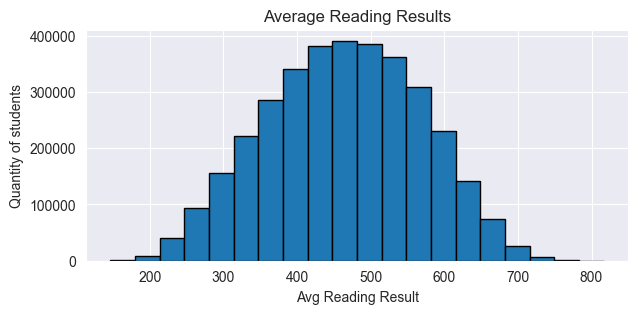

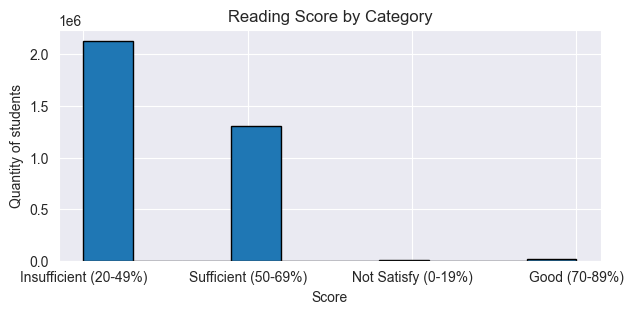

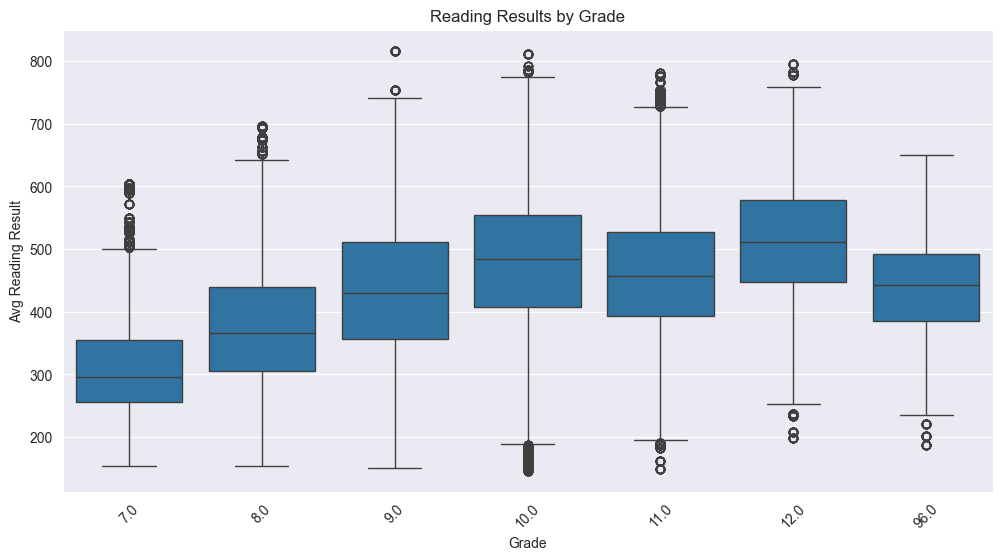

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
plt.hist(teacher["Avg Reading Result"], bins=20, edgecolor='black')
plt.title("Average Reading Results")
plt.ylabel("Quantity of students")
plt.xlabel("Avg Reading Result")
plt.show()

plt.figure(figsize=(7, 3))
plt.hist(teacher["Reading Score Category"], edgecolor='black')
plt.title("Reading Score by Category")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.show()

# 11. Relação entre Age_Category e Weight_(kg)
plt.figure(figsize=(12, 6))
sns.boxplot(x='ST001D01T', y="Avg Reading Result", data=teacher)
plt.title("Reading Results by Grade")
plt.xlabel("Grade")
plt.ylabel("Avg Reading Result")
plt.xticks(rotation=45)
plt.show()

In [15]:
correl = (
    teacher.corr(numeric_only=True)["Avg Reading Result"]
    .abs()
    .sort_values(ascending=False)
)

In [16]:
top_corr = correl.drop("Avg Reading Result").head(20)

top_corr_df = top_corr.reset_index()

top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")

top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)


,Feature,Correlation with Reading Result,Description
0,REPEAT,0.317521,Description not found
1,OECD,0.237895,OECD country
2,TC199Q05HA,0.203348,"In your teaching, to what extent can you do: M..."
3,TC199Q02HA,0.189195,"In your teaching, to what extent can you do: H..."
4,SEFFINS,0.185558,Teacher's self-efficacy in instructional setti...
5,SEFFREL,0.181633,Teacher's self-efficacy in maintaining positiv...
6,TC192Q05HA,0.180791,How often in your lessons: I advise students o...
7,TC199Q03HA,0.168332,"In your teaching, to what extent can you do: C..."
8,FEEDBACK,0.167188,Feedback provided by the teachers (WLE)
9,TC199Q10HA,0.166689,"In your teaching, to what extent can you do: U..."


**Correlation of reading by score category**

Check correlations in every Reading score by category

In [17]:

correl = teacher[teacher["Reading Score Category"] == "Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)

top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

#plt.figure(figsize=(14,14))
#sns.heatmap(corr);

,Feature,Correlation with Reading Result,Description
0,CNTSCHID,NaN,Intl. School ID
1,REPEAT,NaN,Description not found
2,ST001D01T,NaN,Description not found
3,CNTRYID,NaN,Country Identifier
4,CNTTCHID,NaN,Intl. Teacher ID
5,TEACHERID,NaN,Teacher identification code
6,Region,NaN,Region
7,OECD,NaN,OECD country
8,ADMINMODE,NaN,Mode of Respondent
9,LANGTEST,NaN,Language of Questionnaire/Assessment


In [18]:
correl = teacher[teacher["Reading Score Category"] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,W_FSTUWT_SCH_SUM,0.157265,Sum of W_FSTUWT
1,W_SCHGRNRABWT,0.143305,GRADE NONRESPONSE ADJUSTED SCHOOL BASE WEIGHT
2,ST001D01T,0.132288,Description not found
3,OECD,0.105829,OECD country
4,TC182Q02HA,0.087076,Does your school have special programmes for: ...
5,TC202Q02HA,0.085584,How often in your <test language lessons>: I p...
6,ADAPTINSTR,0.079013,Student assessment/use (adaption of instructio...
7,TC182Q03HA,0.076069,Does your school have special programmes for: ...
8,TC046Q07NA,0.072602,How often: Attend team conferences
9,TC156Q08IA,0.067495,"In your <test language lessons>, how often: I ..."


In [19]:
correl = teacher[teacher["Reading Score Category"] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,REPEAT,0.112898,Description not found
1,TC188Q01HA,0.069082,Studied in a country other than [country of test]
2,TC202Q09HA,0.065994,How often in your <test language lessons>: I a...
3,TC163Q03HA,0.065753,How important do you consider teaching the fol...
4,TC018Q11NA,0.062307,"Included in teacher education, training or oth..."
5,GCSELF,0.060164,Teacher's self-efficacy in multicultural envir...
6,TC192Q05HA,0.059504,How often in your lessons: I advise students o...
7,TCDISCLIMA,0.059121,Disciplinary climate in test language lessons ...
8,TC202Q05HA,0.058410,How often in your <test language lessons>: I t...
9,SEFFINS,0.058297,Teacher's self-efficacy in instructional setti...


In [20]:
correl = teacher[teacher["Reading Score Category"] == "Insufficient (20-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,REPEAT,0.247503,Description not found
1,OECD,0.231538,OECD country
2,SEFFREL,0.156237,Teacher's self-efficacy in maintaining positiv...
3,TC199Q05HA,0.147917,"In your teaching, to what extent can you do: M..."
4,TC199Q02HA,0.137962,"In your teaching, to what extent can you do: H..."
5,SEFFINS,0.128148,Teacher's self-efficacy in instructional setti...
6,TC192Q05HA,0.124409,How often in your lessons: I advise students o...
7,TC199Q03HA,0.123202,"In your teaching, to what extent can you do: C..."
8,TC176Q01HA,0.122156,How often involved in: Reading emails
9,TC054Q05NA,0.121147,"Assessing student learning, how often: I let s..."


In [21]:
correl = teacher[teacher["Reading Score Category"] == "Not Satisfy (0-19%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,TC168Q02HA,0.135032,"During the last month, asked students to use d..."
1,W_FSTUWT_SCH_SUM,0.130492,Sum of W_FSTUWT
2,TC188Q01HA,0.127958,Studied in a country other than [country of test]
3,CNTTCHID,0.127331,Intl. Teacher ID
4,CNTRYID,0.127331,Country Identifier
5,Region,0.127325,Region
6,CNTSCHID,0.127319,Intl. School ID
7,TC168Q06HA,0.124126,"During the last month, asked students to use d..."
8,TC186Q01HA,0.122467,Country of birth
9,LANGTEST,0.118165,Language of Questionnaire/Assessment


Due to some categories being NaN, instead of comparing with student score, i'm going to compare by classification (meaning for example the best 10% of students are very good, instead of students with score between 900 and 1000)

In [22]:
def categorize_reading_students_by_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total_students = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total_students * 0.10)
    good_threshold = int(total_students * 0.30)
    sufficient_threshold = int(total_students * 0.60)
    insufficient_threshold = int(total_students * 0.80)

    # Categorize students based on their rank
    df['Reading Score Classification'] = 'Not Satisfy (0-19%)'
    df.loc[:insufficient_threshold-1, 'Reading Score Classification'] = 'Insufficient (20-49%)'
    df.loc[:sufficient_threshold-1, 'Reading Score Classification'] = 'Sufficient (50-69%)'
    df.loc[:good_threshold-1, 'Reading Score Classification'] = 'Good (70-89%)'
    df.loc[:very_good_threshold-1, 'Reading Score Classification'] = 'Very Good (90-100%)'

    return df

teacher = categorize_reading_students_by_performance(teacher)

print("Number of stundents by grade category:")
print("Very Good (90-100%): ", len(teacher[teacher['Reading Score Classification']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(teacher[teacher['Reading Score Classification']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(teacher[teacher['Reading Score Classification']=="Sufficient (50-69%)"]))
print("Insufficient (20-49%): ", len(teacher[teacher['Reading Score Classification']=="Insufficient (20-49%)"]))
print("Not Satisfy (0-19%): ", len(teacher[teacher['Reading Score Classification']=="Not Satisfy (0-19%)"]))


MemoryError: Unable to allocate 8.91 GiB for an array with shape (346, 3456667) and data type float64

In [132]:
correl = teacher[teacher['Reading Score Classification'] == "Very Good (90-100%)"].corr(numeric_only=True)['Avg Reading Result'].sort_values(ascending=False)

top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,ST001D01T,0.610404,Description not found
1,COLT,0.589141,Test language teacher collaboration (WLE)
2,CNTSCHID,0.518109,Intl. School ID
3,TC031Q20NA,0.510770,Teacher cooperation: We discuss ways to better...
4,TC150Q03HA,0.506660,"In your formal education and/or training, did ..."
5,TC150Q04HA,0.452691,"In your formal education and/or training, did ..."
6,TC031Q18NA,0.451971,Teacher cooperation: My fellow teachers of <te...
7,TC150Q06HA,0.400705,"In your formal education and/or training, did ..."
8,TC204Q03HA,0.394409,"During the last 12 months, proportion of profe..."
9,TC039Q01NA,0.380916,Is there any formal curriculum for <test langu...


In [133]:
correl = teacher[teacher['Reading Score Classification'] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,TC204Q02HA,0.455547,"During the last 12 months, proportion of profe..."
1,TC168Q08HA,0.402546,"During the last month, asked students to use d..."
2,TC156Q07IA,0.375287,"In your <test language lessons>, how often: I ..."
3,TC204Q01HA,0.291293,"During the last 12 months, proportion of profe..."
4,CNTSCHID,0.288603,Intl. School ID
5,TC031Q13NA,0.281868,Teacher cooperation: We exchange tasks for les...
6,TC182Q03HA,0.281850,Does your school have special programmes for: ...
7,TCSTIMREAD,0.276070,Teacher's stimulation of reading engagement (WLE)
8,TC150Q05HA,0.270004,"In your formal education and/or training, did ..."
9,TC202Q01HA,0.265253,How often in your <test language lessons>: I t...


In [134]:
correl = teacher[teacher['Reading Score Classification'] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,TC202Q06HA,0.447661,How often in your <test language lessons>: I g...
1,FEEDBINSTR,0.398119,Feedback provided by the teachers (WLE)
2,TC171Q03HA,0.367439,How often in your <test language lessons>: At ...
3,TC202Q08HA,0.341821,How often in your <test language lessons>: I t...
4,TCSTIMREAD,0.301635,Teacher's stimulation of reading engagement (WLE)
5,TC150Q03HA,0.297506,"In your formal education and/or training, did ..."
6,TC156Q05IA,0.292543,"In your <test language lessons>, how often: I ..."
7,TC156Q06IA,0.271889,"In your <test language lessons>, how often: I ..."
8,TC202Q07HA,0.257975,How often in your <test language lessons>: I t...
9,TC156Q08IA,0.257218,"In your <test language lessons>, how often: I ..."


In [135]:
correl = teacher[teacher['Reading Score Classification'] == "Insufficient (20-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,TC168Q12HA,0.558916,"During the last month, asked students to use d..."
1,TC039Q01NA,0.434639,Is there any formal curriculum for <test langu...
2,TC182Q02HA,0.414102,Does your school have special programmes for: ...
3,TCSTIMREAD,0.409529,Teacher's stimulation of reading engagement (WLE)
4,TC031Q20NA,0.407086,Teacher cooperation: We discuss ways to better...
5,TC156Q05IA,0.398038,"In your <test language lessons>, how often: I ..."
6,TC150Q07HA,0.355449,"In your formal education and/or training, did ..."
7,TC150Q01HA,0.349559,"In your formal education and/or training, did ..."
8,TC031Q11NA,0.347776,Teacher cooperation: We discuss the criteria w...
9,TC204Q01HA,0.334133,"During the last 12 months, proportion of profe..."


In [136]:
correl = teacher[teacher['Reading Score Classification'] == "Not Satisfy (0-19%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,REPEAT,0.658283,Description not found
1,TC171Q04HA,0.628827,How often in your <test language lessons>: I t...
2,TC163Q04HA,0.530522,How important do you consider teaching the fol...
3,TC167Q01HA,0.485881,"Within the last month, have digital devices [...."
4,ST001D01T,0.453697,Description not found
5,TC202Q01HA,0.447011,How often in your <test language lessons>: I t...
6,FEEDBINSTR,0.426799,Feedback provided by the teachers (WLE)
7,TC202Q06HA,0.413403,How often in your <test language lessons>: I g...
8,TC168Q05HA,0.410604,"During the last month, asked students to use d..."
9,TC170Q04HA,0.400350,How often in your <test language lessons>: Stu...


## 2.4 Verify data quality


In [137]:
# Visualização geral de valores ausentes
#missing_summary = pd.DataFrame({
#    'Missing Values': teacher.isnull().sum(),
#    'Percentage Missing': (teacher.isnull().mean() * 100).round(2)
#})

# Ordenar pelo número de valores ausentes
#missing_summary = missing_summary[missing_summary['Missing Values'] > 0.7].sort_values(by='Missing Values', ascending=False)

#print("Resumo de valores ausentes:\n")
#print(missing_summary)

# Identificar linhas com valores ausentes
#rows_with_missing = teacher[teacher.isnull().any(axis=1)]
#print(f"\nNúmero de linhas com valores ausentes: {len(rows_with_missing)}")

# Exibir um sample de linhas com valores ausentes
#if len(rows_with_missing) > 0:
#    print("\nExemplo de linhas com valores ausentes:")
#    print(rows_with_missing.head())

In [138]:
print("\n--- Missing Values ---")
missing = teacher.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
SEFFCM        1.000
SEFFREL       1.000
TC150Q06HA    0.860
TC168Q08HA    0.860
TC150Q07HA    0.859
              ...  
TC168Q01HA    0.854
TC168Q02HA    0.854
TC168Q03HA    0.854
TC168Q04HA    0.854
TC168Q05HA    0.854
Length: 79, dtype: float64
